In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

### 1.生成样本集

In [9]:
# 模拟数据点
def generate(sample_size, mean, cov, diff, regression):
    num_classes = 2  # len(diff)
    samples_per_class = int(sample_size/2)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)

    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)

        X0 = np.concatenate((X0, X1))
        Y0 = np.concatenate((Y0, Y1))

    if regression == False:  # one-hot  0 into the vector "1 0
        class_ind = [Y == class_number for class_number in range(num_classes)]
        Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    X, Y = shuffle(X0, Y0)

    return X, Y

[[ 1.70933959  2.32968695]
 [ 0.95917076 -0.25204712]
 [ 1.00838527  1.37942458]
 ...
 [ 1.62452723  0.24447172]
 [ 3.6797459   3.68605693]
 [ 2.46037166  0.01746894]]
[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 0

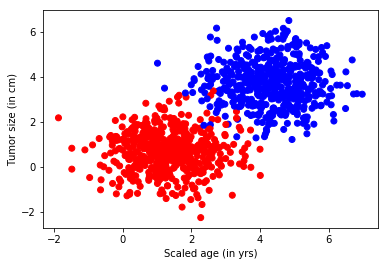

In [10]:
# 定义随机数的种子值（这样可以保证每次运行代码时生成的随机值都一样）
np.random.seed(10)

# 输入数据的维度
input_dim = 2
# 定义生成类的个数
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)

# 生成1000个点，2类数据
X, Y = generate(1000, mean, cov, [3.0], True)
print(X)
print(Y)

# 散点图
colors = ['r' if l == 0 else 'b' for l in Y[:]]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()

### 2.构建网络结构

In [11]:
# 标签维度
lab_dim = 1

# tf Graph Input
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_labels = tf.placeholder(tf.float32, [None, lab_dim])

# 学习参数
W = tf.Variable(tf.random_normal([input_dim, lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")

# 激活函数sigmoid
output = tf.nn.sigmoid(tf.matmul(input_features, W) + b)
# 损失函数，交叉熵
cross_entropy = -(input_labels * tf.log(output) +
                  (1 - input_labels) * tf.log(1 - output))

# 平方误差差
ser = tf.square(input_labels - output)
# 平均后的交叉熵
loss = tf.reduce_mean(cross_entropy)
# 均方误差
err = tf.reduce_mean(ser)

# 优化器
optimizer = tf.train.AdamOptimizer(0.04)  # 尽量用这个--收敛快，会动态调节梯度
train = optimizer.minimize(loss)  # let the optimizer train

### 3.设置参数进行训练

Epoch: 0001 cost= 0.361338586 err= 0.21668950729072095
Epoch: 0002 cost= 0.210241616 err= 0.08766978904604912
Epoch: 0003 cost= 0.154605582 err= 0.05105296554975212
Epoch: 0004 cost= 0.124835879 err= 0.03713253655005246
Epoch: 0005 cost= 0.105880976 err= 0.029866919026244432
Epoch: 0006 cost= 0.092724420 err= 0.025474874780047684
Epoch: 0007 cost= 0.083055824 err= 0.022581801912747324
Epoch: 0008 cost= 0.075639963 err= 0.020557936088880523
Epoch: 0009 cost= 0.069759175 err= 0.019076537911314518
Epoch: 0010 cost= 0.064970188 err= 0.017953224066877736
Epoch: 0011 cost= 0.060985126 err= 0.017077030887594446
Epoch: 0012 cost= 0.057609621 err= 0.01637766822532285
Epoch: 0013 cost= 0.054707617 err= 0.015808696273597888
Epoch: 0014 cost= 0.052181140 err= 0.015338320113369264
Epoch: 0015 cost= 0.049957529 err= 0.014944112149532885
Epoch: 0016 cost= 0.047982465 err= 0.014609840828052256
Epoch: 0017 cost= 0.046213768 err= 0.014323496920405887
Epoch: 0018 cost= 0.044618726 err= 0.0140760113659780

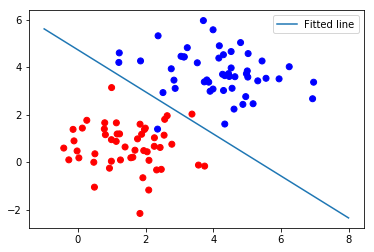

In [12]:
# 迭代50次
maxEpochs = 50
# 每批次的训练数量
minibatchSize = 25

# 启动session
with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())

    for epoch in range(maxEpochs):
        sumerr = 0
        # len(Y)/minibatchSize为每一次迭代的批次数
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize, :]
            y1 = np.reshape(Y[i*minibatchSize:(i+1)*minibatchSize], [-1, 1])
            tf.reshape(y1, [-1, 1])
            _, lossval, outputval, errval = sess.run([train, loss, output, err], 
                                                     feed_dict={input_features: x1, 
                                                                input_labels: y1})
            # 记录每次迭代的累计误差
            sumerr = sumerr+errval

        print("Epoch:", '%04d' % (epoch+1), 
              "cost=", "{:.9f}".format(lossval), 
              "err=", sumerr/np.int32(len(Y)/minibatchSize))

# 4.数据可视化
    train_X, train_Y = generate(100, mean, cov, [3.0], True)
    colors = ['r' if l == 0 else 'b' for l in train_Y[:]]
    plt.scatter(train_X[:, 0], train_X[:, 1], c=colors)
    #plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y)
    # plt.colorbar()


#    x1w1+x2*w2+b=0
#    x2=-x1* w1/w2-b/w2
    x = np.linspace(-1, 8, 200)
    y = -x*(sess.run(W)[0]/sess.run(W)[1])-sess.run(b)/sess.run(W)[1]
    plt.plot(x, y, label='Fitted line')
    plt.legend()
    plt.show()